In [2]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

ModuleNotFoundError: No module named 'masquer'

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# <span style="color:red;"><center>CHAPITRE 2 - Cryptographie</center></span>

## I. Chiffrement de César

**def:**
Le chiffrement de César est un protocole de chiffrement **symétrique** c'est à dire que la personne qui doit crypter le message et celle qui doit le décrypter doivent d'abord se mettre d'accord sur la clé de chiffrement et donc la partager. Ce transfert de clé est très sensible car toute personne interceptant cette clé pourra alors déchiffrer toute la suite de l'échange crypté.


Regardez la vidéo ci-dessous jusqu'à **2:52** pour une présentation du chiffrement de César

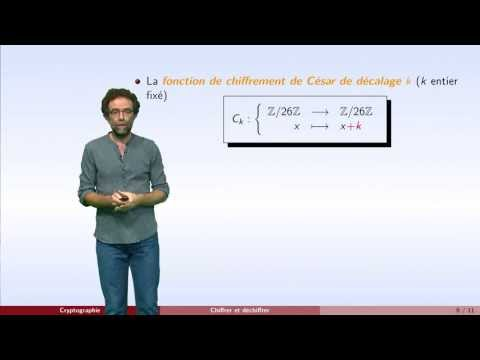

In [4]:
import IPython.display
from IPython.display import YouTubeVideo
YouTubeVideo("g8RmT-CwTMo",width=640,height=550)

## Exercice 1
On se limitera aux **lettres majuscules** afin de simplifier le codage des fonctions. 
1. Ecrire une fonction **chiffre** qui prend comme argument un caractère et qui renvoie le rang de la lettre dans l'alphabet (entier entre 0 et 25). Vous pourrez utiliser la documentation de la fonction **ord**.
2. Ecrire une fonction **dechiffre** qui prend comme argument un entier entre 0 et 25 correspondant au rang d'une lettre dans l'alphabet et qui renvoie la lettre correspondante sous forme d'un caractère. Vous pourrez utiliser la documentation de la fonction **chr**. 
3. Ecrire une fonction **cesar** qui prend comme argument un message sous forme d'une chaine de caractères et un entier servant de clé de chiffrement et qui renvoie une chaine de caractères correspondant au message crypté (les espaces et la ponctuation sont laissés en clair)
4. Ecrire une fonction **decesar** qui prend comme argument un message crypté et un entier n servant de clé de chiffrement et qui renvoie le message décodé.
5. Regardez la vidéo ci-dessus entre **13:26** et **14:52**. Proposez alors une fonction **crasse_cesar** qui prend en argument un message crypté et qui vous aidera à déchiffrer le message et obtenir la clé de chiffrement.

In [13]:
# 1.
def chiffre(cara):
    """
    Renvoie la position du caractère en argument dans l'alphabet.
    cara est de type str.
    """
    assert type(cara) == str, "cara soit être un caractère de type str."
    assert cara.isalpha(), "cara doit être une lettre de l'alphabet."
    assert len(cara) == 1, "cara doit être un seul caractère."
    cara2 = cara.upper()
    return ord(cara2)-65

chiffre("a")

0

In [71]:
# 2.
def dechiffre(chiffre):
    """
    Renvoie la lettre dont la position dans l'alphabet est le chiffre entré.
    chiffre est un int entre 0 et 25.
    """
    assert type(chiffre) == int, "chiffre doit être un entier."
    assert chiffre >= 0, "chiffre doit être positif."
    assert 0 <= chiffre <= 25, "chiffre doit être positif et inférieur à 50"
    return chr(chiffre+65)

dechiffre(0)

'A'

In [86]:
# 3.
def cesar(texte, cle):
    """
    Renvoie le texte crypté selon la clé par le chiffrement de César.
    texte est un str.
    cle est un int entre 0 et 25.
    """
    assert type(texte) == str, "txt doit être un str."
    assert type(cle) == int, "cle doit être un int."
    assert 0 <= cle <= 25, "cle doit être entre 0 et 25."
    crypted = []
    for i in range(len(texte)):
        if texte[i].isalpha():
            crypted.append(dechiffre((chiffre(texte[i])+cle)%26))
        else:
            crypted.append(texte[i])
    return "".join(crypted)

cesar("baguette", 25)

'AZFTDSSD'

In [93]:
# 4.
def decesar(texte, cle):
    """
    Renvoie le texte décrypté selon la clé par le chiffrement de César.
    texte est un str.
    cle est un int entre 0 et 25.
    """
    assert type(texte) == str, "texte doit être un str."
    assert type(cle) == int, "cle doit être un int."
    assert 0 <= cle <= 25, "cle doit être un entier entre 0 et 25."
    decrypted = []
    for i in range(len(texte)):
        if texte[i].isalpha():
            decrypted.append(dechiffre((chiffre(texte[i])-cle)%26))
        else:
            decrypted.append(texte[i])
    return "".join(decrypted)

decesar("AZFTDSSD", 25)

'BAGUETTE'

In [94]:
# 5.
def crasse_cesar(texte):
    """
    Renvoie toutes les façons de dérypter le message crypté passé en argument. Il est facile de retrouver le message décrypté parmis les 26 messages.
    texte est un str.
    """
    assert type(texte) == str, "texte doit être un str."
    for i in range(26):
        decrypted = []
        for j in range(len(texte)):
            if texte[j].isalpha():
                decrypted.append(dechiffre((chiffre(texte[j])-i)%26))
            else:
                decrypted.append(texte[j])
        print("".join(decrypted))
        
crasse_cesar("AZFTDSSD")

AZFTDSSD
ZYESCRRC
YXDRBQQB
XWCQAPPA
WVBPZOOZ
VUAOYNNY
UTZNXMMX
TSYMWLLW
SRXLVKKV
RQWKUJJU
QPVJTIIT
POUISHHS
ONTHRGGR
NMSGQFFQ
MLRFPEEP
LKQEODDO
KJPDNCCN
JIOCMBBM
IHNBLAAL
HGMAKZZK
GFLZJYYJ
FEKYIXXI
EDJXHWWH
DCIWGVVG
CBHVFUUF
BAGUETTE


<center> <a href="cours_03_2.ipynb">SUIVANT =></a></center>